In [63]:
# imports

from filterpy.kalman import KalmanFilter
from filterpy.kalman import predict
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

import numpy as np 
import csv 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

In [64]:
# data

fpath = "maybe_cleaned_sleep_analysis.csv"
df = pd.read_csv(fpath)

sleep_data = [row for row in df["value"]]
S = np.array(sleep_data)

In [65]:
# interpolate

In [66]:
# filter

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([2., 0.])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P = np.array([[1000.,    0.],
                 [   0., 1000.]])
kf.R = np.array([[5.]])
kf.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [67]:
# use filter

interpolated = list()
dates = list()

with open("interpolated_sleep_analysis.csv", 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        interpolated.append(float(row[1]))
        dates.append(pd.to_datetime(row[0]))

S = iter(interpolated)

xs = list()
xxs = list()
z = next(S, None)
while z is not None:

    kf.predict()
    kf.update(z)

    xs.append(kf.x_post[0])
    xxs.append(kf.x_post[1])

    z = next(S, None)

<Axes: >

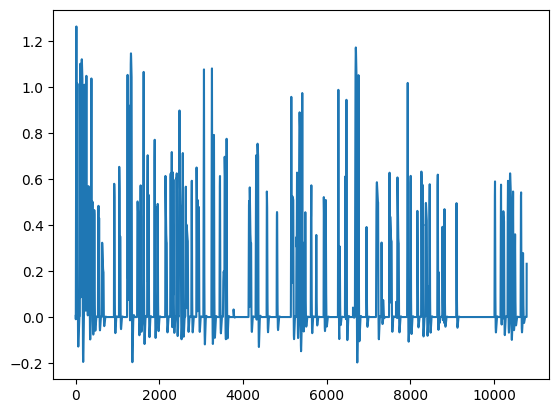

In [68]:
# plot

sns.lineplot(
    x=range(len(xs)), y=xs
)

<Axes: >

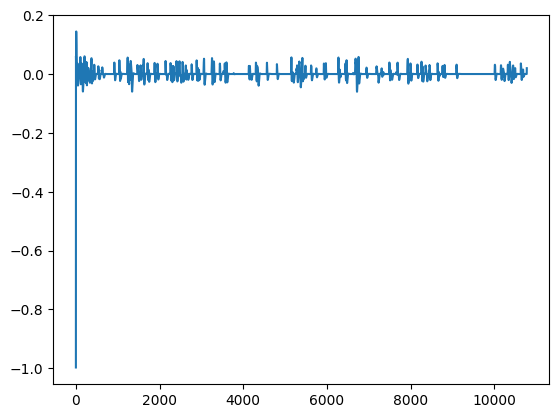

In [69]:
sns.lineplot(
    x=range(len(xxs)), y=xxs
)

ensemble with 
* energy burned
* take a look at using applestandtime